This is a simple notebook to create a color data set to be used in computer vision.

The source for this dataset is the List of Colors found on Wikipedia and ColorHEXA:
 - https://en.wikipedia.org/wiki/List_of_colors:_A%E2%80%93F
 - https://en.wikipedia.org/wiki/List_of_colors:_G%E2%80%93M
 - https://en.wikipedia.org/wiki/List_of_colors:_N%E2%80%93Z
 - https://www.colorhexa.com/color-names
 
The Code below will create a directory called colorsq and then make a 64x64 pixel square of each color.
 
The idea with this data is that you can use it with an object detection model to understand the color of the object you found.

My idea about adding this dataset to an already pretrained model comes from: https://youtu.be/tY0n9OT5_nA?t=6923

It shows how taking many dataset you can find new things in the data.

My idea was could I ask for a "Red Car" or something that includes color.

In [1]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from fastai.vision import *
from PIL import Image, ImageDraw, ImageFile
import pathlib
import pandas as pd

PATH="colorsq"

pathlib.Path(PATH).mkdir(parents=True, exist_ok=True) 

def color_square(NAME, HEX, PATH):
  size = 64
  color_sq = Image.new('RGB', (size, size), (255,255,255,0))
  img_draw = ImageDraw.Draw(color_sq)
  img_draw.rectangle((0, 0, size, size), fill='#{}'.format(HEX))
  color_sq.save("{}/{}.jpg".format(PATH,NAME.replace(" ","_")), "JPEG", quality=1)

In [43]:
url="https://raw.githubusercontent.com/dusten/Project_Ideas/master/Color.csv"
colors=pd.read_csv(url)
colors = colors.sort_values('NAME')

colors.head(10)

colors['HEX'] = colors['HEX'].str.upper()
colors['NAME'] = colors['NAME'].str.lower()

colors.head(10)


,NAME,HEX,RED,GREEN,BLUE
0,absolute zero,0048BA,0,72,186
1,acid green,B0BF1A,176,191,26
2,aero blue,C9FFE5,201,255,229
3,air force blue 1,7CB9E8,124,185,232
4,air force blue 2,5D8AA8,93,138,168
5,air superiority blue,72A0C1,114,160,193
6,alabaster,EDEAE0,237,234,224
7,alice blue,F0F8FF,240,248,255
8,alien armpit,C5E17A,197,225,122
9,alizarin crimson,E32636,227,38,54


,NAME,HEX,RED,GREEN,BLUE
0,absolute zero,0048BA,0,72,186
1,acid green,B0BF1A,176,191,26
2,aero blue,C9FFE5,201,255,229
3,air force blue 1,7CB9E8,124,185,232
4,air force blue 2,5D8AA8,93,138,168
5,air superiority blue,72A0C1,114,160,193
6,alabaster,EDEAE0,237,234,224
7,alice blue,F0F8FF,240,248,255
8,alien armpit,C5E17A,197,225,122
9,alizarin crimson,E32636,227,38,54


In [ ]:
%%script false

color=pd.DataFrame(colors,columns=['NAME','HEX','RED','GREEN','BLUE'])

with open('raw_color') as afile:
  for line in afile:
    name = line.strip()
    for nextline in afile:
      hrgb = nextline.split('\t')
      print("Name: {} - hex: {}".format(name, hrgb[0][1:]))
      color = color.append({'NAME': name, 'HEX': hrgb[0][1:], 'RED': hrgb[1], 'GREEN': hrgb[2], 'BLUE': hrgb[3]}, ignore_index=True) 
      break  # done with the inner loop

len(color)

color.to_csv(header=True, index=False, quoting=1)       


In [46]:
color=pd.DataFrame(colors,columns=['NAME','HEX'])

for index,row in color.iterrows():
  color_square(row['NAME'],row['HEX'],PATH)


In [47]:
!du -sh { PATH }

5.0M	colorsq


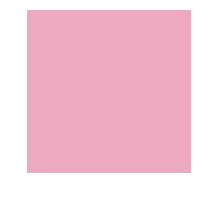

In [6]:
img = open_image("colorsq/Pastel_magenta.jpg")
img.show()